In [99]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
!pip install scikit-plot

In [101]:
import pandas as pd
import numpy as np
from sklearn import tree,svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,auc,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
%matplotlib inline

In [102]:
data=pd.read_csv("/content/drive/MyDrive/Dataset/MoviesOnStreamingPlatforms_updated.csv")

In [103]:
data

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Drama,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15822,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Drama,Family,Fantasy,Horror",United States,English,120.0
15823,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Drama,Family,Sci-Fi",United States,English,90.0
15824,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
15825,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


#display the number of rows and columns

In [104]:
data.shape

(15827, 17)

#display the datatype of data

In [105]:
data.dtypes

Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [106]:
data.rename(columns ={'Prime Video':'Prime','Disney+':'Disney'},inplace=True)

#Drop the columns

In [107]:
data=data.drop(['Rotten Tomatoes','Type'],axis=1)

#display the first five rows

In [108]:
data.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Drama,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


#display the last five rows

In [109]:
data.tail()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
15822,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,Bruce Bilson,"Drama,Family,Fantasy,Horror",United States,English,120.0
15823,16740,16741,The Poof Point,2001,7+,4.7,0,0,0,1,Neal Israel,"Drama,Family,Sci-Fi",United States,English,90.0
15824,16741,16742,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN
15825,16742,16743,Man Among Cheetahs,2017,NaN,6.6,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,NaN
15826,16743,16744,In Beaver Valley,1950,NaN,NaN,0,0,0,1,James Algar,"Documentary,Short,Family",United States,English,32.0


#display all the information

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15827 entries, 0 to 15826
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15827 non-null  int64  
 1   ID          15827 non-null  int64  
 2   Title       15827 non-null  object 
 3   Year        15827 non-null  int64  
 4   Age         7252 non-null   object 
 5   IMDb        15788 non-null  float64
 6   Netflix     15827 non-null  int64  
 7   Hulu        15827 non-null  int64  
 8   Prime       15827 non-null  int64  
 9   Disney      15827 non-null  int64  
 10  Directors   15345 non-null  object 
 11  Genres      15720 non-null  object 
 12  Country     15602 non-null  object 
 13  Language    15450 non-null  object 
 14  Runtime     15463 non-null  float64
dtypes: float64(2), int64(7), object(6)
memory usage: 1.8+ MB


#check for any duplicates value

In [111]:
data.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
15822    False
15823    False
15824    False
15825    False
15826    False
Length: 15827, dtype: bool>

In [112]:
duplicate=data[data.duplicated()]
duplicate

,Unnamed: 0,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime


In [113]:
data=pd.DataFrame.drop_duplicates(data)

In [114]:
data.duplicated().sum()

0

#Drop the null value

In [115]:
data.dropna(axis=0,how='any').shape

(6979, 15)

In [116]:
data.dropna(axis=0,how='any',inplace=True)

#check for all null vlaues

In [117]:
data.isnull().sum()

Unnamed: 0    0
ID            0
Title         0
Year          0
Age           0
IMDb          0
Netflix       0
Hulu          0
Prime         0
Disney        0
Directors     0
Genres        0
Country       0
Language      0
Runtime       0
dtype: int64

#checking the null value of Age

In [118]:
data['Age'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
15809    False
15810    False
15820    False
15821    False
15823    False
Name: Age, Length: 6979, dtype: bool

In [119]:
data

,Unnamed: 0,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Drama,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15809,16726,16727,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,John Murlowski,"Drama,Family",United States,English,84.0
15810,16727,16728,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,Nick Marck,"Adventure,Family",United States,English,77.0
15820,16737,16738,The Bears and I,1974,all,6.2,0,0,0,1,Bernard McEveety,"Drama,Family",United States,English,89.0
15821,16738,16739,Whispers: An Elephant's Tale,2000,all,5.0,0,0,0,1,Dereck Joubert,"Adventure,Family",United States,English,72.0


In [120]:
data.isnull().sum()

Unnamed: 0    0
ID            0
Title         0
Year          0
Age           0
IMDb          0
Netflix       0
Hulu          0
Prime         0
Disney        0
Directors     0
Genres        0
Country       0
Language      0
Runtime       0
dtype: int64

In [121]:
data['Age'] = data['Age'].replace(['all'],'18+')


In [122]:
data['Age'].unique()

array(['13+', '18+', '7+', '16+'], dtype=object)

In [123]:
data.isnull()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15809,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15810,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15820,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#Availability of Movie on Netflix

In [124]:
data['Netflix'].value_counts()

0    5437
1    1542
Name: Netflix, dtype: int64

#Availability of Movie on Prime

In [125]:
data['Prime'].value_counts()

1    4750
0    2229
Name: Prime, dtype: int64

#Availability of Movie on Disney+Hotstar

In [126]:
data['Disney'].value_counts()

0    6491
1     488
Name: Disney, dtype: int64

#Availability of Movie on Hulu

In [127]:
data['Hulu'].value_counts()

0    6413
1     566
Name: Hulu, dtype: int64

#top 15 rated movies according to **IMDb**

In [128]:
data.sort_values(by="IMDb",ascending=False).head(15)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
6990,7491,7492,Finding Family,2013,13+,9.1,0,0,1,0,"Chris Leslie,Oggi Tomic","Documentary,Family,History,War","United Kingdom,Bosnia and Herzegovina","Bosnian,English",56.0
3069,3560,3561,The Dark Knight,2008,13+,9.0,0,1,0,0,Christopher Nolan,"Action,Crime,Drama,Thriller","United States,United Kingdom","English,Mandarin",152.0
4328,4829,4830,The Mountain II,2016,18+,8.9,0,0,1,0,Alper Caglar,"Action,Drama,War",Turkey,Turkish,135.0
6339,6840,6841,Peter Gabriel: Secret World Live,1993,18+,8.9,0,0,1,0,François Girard,"Documentary,Music",Canada,English,102.0
8710,9213,9214,Street Dogs of South Central,2013,18+,8.8,0,0,1,0,Bill Marin,Documentary,United States,English,83.0
7746,8247,8248,Memories 677,2011,13+,8.8,0,0,1,0,"Kôji Morimoto,Tensai Okamura,Katsuhiro Ôtomo","Animation,Drama,Fantasy,Horror,Sci-Fi,Thriller",Japan,"Japanese,English,Italian",113.0
7142,7643,7644,Machine Gun Preacher Documentary,2014,16+,8.8,0,0,1,0,"Kevin Evans,Zac Simpson",Documentary,"United States,Australia",English,73.0
0,0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
3070,3561,3562,GoodFellas,1990,18+,8.7,0,1,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian",146.0


#how many movie are made in 2020 and have imdb >5

In [129]:
data[(data["IMDb"]>=5)&(data["Year"]==2020)].count()

Unnamed: 0    31
ID            31
Title         31
Year          31
Age           31
IMDb          31
Netflix       31
Hulu          31
Prime         31
Disney        31
Directors     31
Genres        31
Country       31
Language      31
Runtime       31
dtype: int64

#Realtion of IMDb with other platform

In [130]:
r = data.sort_values(by='IMDb', ascending=False)
r = r[0:20]
r = r[['Title','IMDb','Netflix','Hulu','Prime','Disney']]
r.style.bar(subset=["Netflix",], color='#ff6b6b')\
                 .bar(subset=["Hulu"], color='#95d5b2')\
                 .bar(subset=["Prime"], color='#a2d2ff')\
                 .bar(subset=["Disney"], color='#72efdd')\
                 .bar(subset=["IMDb"],color='#').background_gradient(cmap='Purples')

,Title,IMDb,Netflix,Hulu,Prime,Disney
6990,Finding Family,9.100000,0,0,1,0
3069,The Dark Knight,9.000000,0,1,0,0
4328,The Mountain II,8.900000,0,0,1,0
6339,Peter Gabriel: Secret World Live,8.900000,0,0,1,0
8710,Street Dogs of South Central,8.800000,0,0,1,0
7746,Memories 677,8.800000,0,0,1,0
7142,Machine Gun Preacher Documentary,8.800000,0,0,1,0
0,Inception,8.800000,1,0,0,0
4,"The Good, the Bad and the Ugly",8.800000,1,0,1,0
3070,GoodFellas,8.700000,0,1,0,0


#Movies released Years

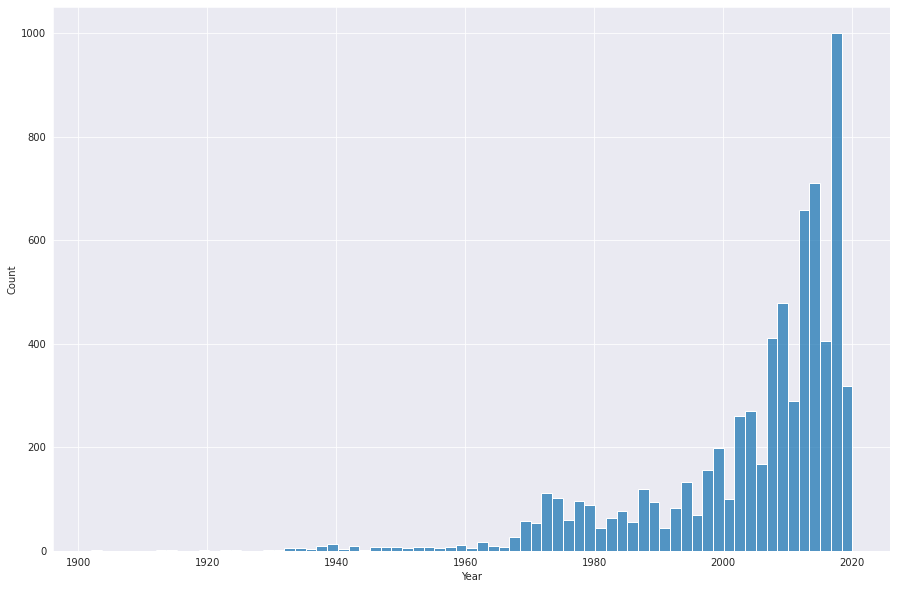

In [131]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.histplot(data.Year,kde=False)

In [132]:
def split_multicolumn(genres):
    result_df = genres.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in genres[genres.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

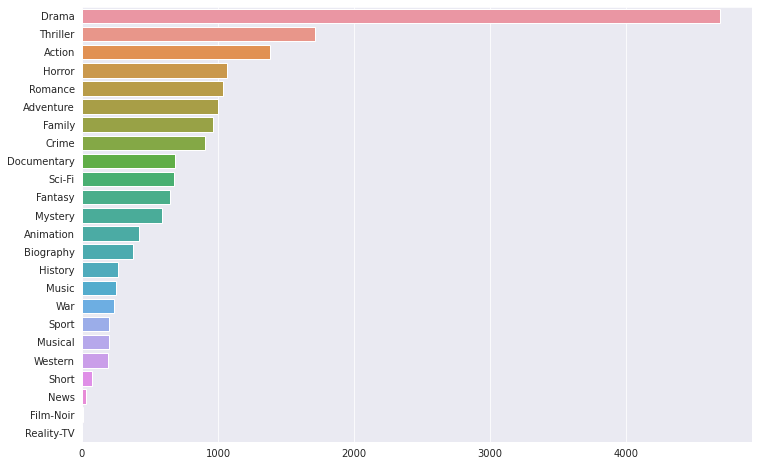

In [133]:
genres_df = split_multicolumn(data.Genres)
movie_genres = genres_df.sum().sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=movie_genres.values, y=movie_genres.index);

In [134]:
data['Genres'].value_counts().head(25)

Drama                                       969
Drama,Romance                               459
Documentary                                 304
Horror                                      193
Horror,Thriller                             150
Action,Drama                                129
Drama,Family                                128
Drama,Thriller                              109
Crime,Drama,Thriller                         88
Horror,Mystery,Thriller                      82
Documentary,Drama                            81
Thriller                                     72
Drama,Horror                                 71
Action,Crime,Drama,Thriller                  66
Action,Thriller                              63
Crime,Drama                                  62
Biography,Drama                              61
Drama,Mystery,Thriller                       57
Action                                       53
Action,Crime,Thriller                        50
Action,Crime,Drama                      

In [135]:
data.shape

(6979, 15)


Here we can see that Drama,Drama and Romance and Documentary are mostly watched by users.

# Predicting which platform is most popular way to watch the movies.

In [136]:
selected_col =['Netflix','Prime', 'Disney','Hulu']
platforms_data = data[selected_col]

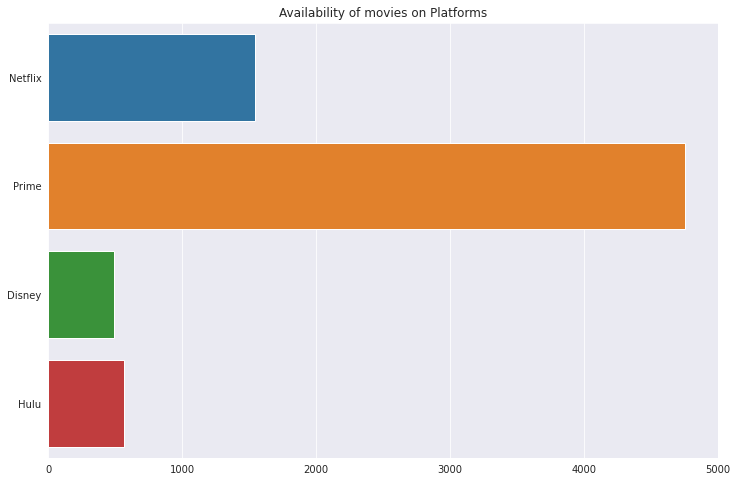

In [137]:
platforms = platforms_data.sum()

plt.figure(figsize=(12,8))
plt.xlim(0,5000)
plt.title('Availability of movies on Platforms')

sns.barplot(x=platforms.values, y=platforms.index);
plt.show()

#Movie that have rating more than 8

In [138]:
#Creating dataframes for each platform
Hulu_data = data.loc[(data['Hulu'] > 0) ]
Disney_data = data.loc[(data['Disney'] > 0) ]
Prime_data = data.loc[(data['Prime'] > 0)  ]
Netflix_data = data.loc[(data['Netflix'] > 0)  ]

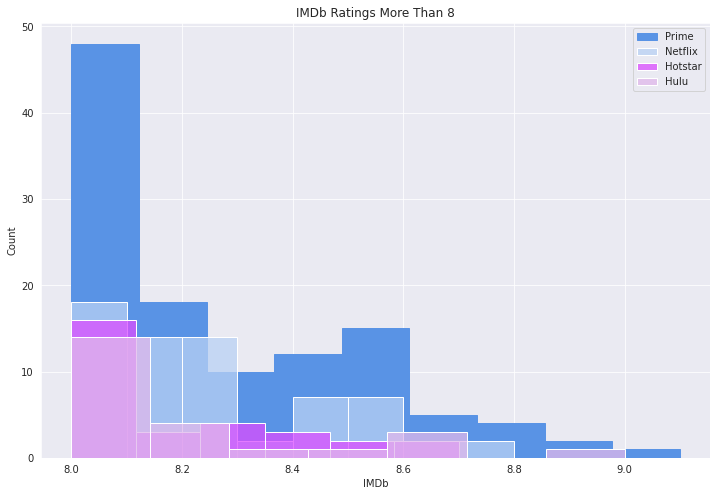

In [139]:
Prime_movie_rating = Prime_data.loc[(Prime_data['IMDb'] >= 8)] 
Netflix_movie_rating = Netflix_data.loc[(Netflix_data['IMDb'] >= 8) ]
Hotstar_movies_rating = Disney_data.loc[(Disney_data['IMDb'] >= 8)] 
Hulu_movie_rating = Hulu_data.loc[(Hulu_data['IMDb'] >= 8)]



plt.figure(figsize=(12,8))
plt.title('IMDb Ratings More Than 8')


sns.histplot(Prime_movie_rating['IMDb'], COLOR='#5993E5',kde=False)
sns.histplot(Netflix_movie_rating['IMDb'], color='#B9D1F4', kde=False)
sns.histplot(Hotstar_movies_rating['IMDb'], color='#DB4DFF', kde=False) 
sns.histplot(Hulu_movie_rating['IMDb'], color='#E0B8EB', kde=False)
                                      
                                      
plt.legend(['Prime', 'Netflix', 'Hotstar', 'Hulu'])
plt.show()

Here we can clearly see that prime has more number of movies than Netflix,Hotstar and also Prime has high number of rating than other Platforms.

#One_Hot_Encoding

In [140]:
one_hot_data = pd.get_dummies(data[['IMDb','Age','Genres','Netflix','Prime','Disney','Hulu']])
one_hot_data

,IMDb,Netflix,Prime,Disney,Hulu,Age_13+,Age_16+,Age_18+,Age_7+,Genres_Action,"Genres_Action,Adventure","Genres_Action,Adventure,Biography","Genres_Action,Adventure,Biography,Drama,History","Genres_Action,Adventure,Biography,Drama,Romance","Genres_Action,Adventure,Crime","Genres_Action,Adventure,Crime,Drama","Genres_Action,Adventure,Crime,Drama,Fantasy,Horror,Mystery,Thriller","Genres_Action,Adventure,Crime,Drama,Horror,Mystery,Thriller","Genres_Action,Adventure,Crime,Drama,Horror,Thriller","Genres_Action,Adventure,Crime,Drama,Mystery,Thriller","Genres_Action,Adventure,Crime,Drama,Romance","Genres_Action,Adventure,Crime,Drama,Sport,Thriller","Genres_Action,Adventure,Crime,Drama,Thriller","Genres_Action,Adventure,Crime,Drama,Thriller,War","Genres_Action,Adventure,Crime,Fantasy,Mystery,Sci-Fi,Thriller","Genres_Action,Adventure,Crime,Mystery,Romance,Thriller","Genres_Action,Adventure,Crime,Mystery,Thriller","Genres_Action,Adventure,Crime,Thriller","Genres_Action,Adventure,Drama","Genres_Action,Adventure,Drama,Crime","Genres_Action,Adventure,Drama,Crime,Drama,Thriller","Genres_Action,Adventure,Drama,Crime,Family","Genres_Action,Adventure,Drama,Crime,Family,Mystery","Genres_Action,Adventure,Drama,Crime,Family,Mystery,Sci-Fi","Genres_Action,Adventure,Drama,Crime,Family,Romance,Sport","Genres_Action,Adventure,Drama,Crime,Horror,Sci-Fi,Thriller","Genres_Action,Adventure,Drama,Crime,Thriller","Genres_Action,Adventure,Drama,Family","Genres_Action,Adventure,Drama,Family,Fantasy","Genres_Action,Adventure,Drama,Family,Fantasy,Sci-Fi",...,"Genres_Romance,Sci-Fi","Genres_Romance,Thriller","Genres_Romance,Thriller,War","Genres_Romance,Western",Genres_Sci-Fi,"Genres_Sci-Fi,Drama","Genres_Sci-Fi,Horror","Genres_Sci-Fi,Thriller","Genres_Sci-Fi,Thriller,War","Genres_Sci-Fi,Western","Genres_Short,Action","Genres_Short,Action,Adventure,Drama,Fantasy,Sci-Fi","Genres_Short,Action,Crime,Thriller","Genres_Short,Adventure,Drama,Fantasy,Thriller,War,Western","Genres_Short,Crime,Drama","Genres_Short,Crime,Drama,Romance,Thriller","Genres_Short,Documentary","Genres_Short,Drama","Genres_Short,Drama,Crime,Drama,Fantasy,Music,Mystery,Thriller","Genres_Short,Drama,Family,History","Genres_Short,Drama,Music","Genres_Short,Drama,Music,Romance","Genres_Short,Drama,Music,Sport","Genres_Short,Drama,Mystery,Thriller","Genres_Short,Drama,Romance","Genres_Short,Family","Genres_Short,Mystery,Thriller",Genres_Sport,"Genres_Sport,Thriller",Genres_Thriller,"Genres_Thriller,Action,Adventure,Drama,Horror","Genres_Thriller,Crime","Genres_Thriller,Crime,Drama","Genres_Thriller,Drama","Genres_Thriller,Horror","Genres_Thriller,War",Genres_War,"Genres_War,Drama",Genres_Western,"Genres_Western,Drama"
0,8.8,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8.7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8.5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8.5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.8,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15809,4.1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [141]:
one_hot_data = pd.get_dummies(data[['IMDb','Age','Genres','Netflix','Prime','Disney','Hulu']],drop_first=True)
one_hot_data

,IMDb,Netflix,Prime,Disney,Hulu,Age_16+,Age_18+,Age_7+,"Genres_Action,Adventure","Genres_Action,Adventure,Biography","Genres_Action,Adventure,Biography,Drama,History","Genres_Action,Adventure,Biography,Drama,Romance","Genres_Action,Adventure,Crime","Genres_Action,Adventure,Crime,Drama","Genres_Action,Adventure,Crime,Drama,Fantasy,Horror,Mystery,Thriller","Genres_Action,Adventure,Crime,Drama,Horror,Mystery,Thriller","Genres_Action,Adventure,Crime,Drama,Horror,Thriller","Genres_Action,Adventure,Crime,Drama,Mystery,Thriller","Genres_Action,Adventure,Crime,Drama,Romance","Genres_Action,Adventure,Crime,Drama,Sport,Thriller","Genres_Action,Adventure,Crime,Drama,Thriller","Genres_Action,Adventure,Crime,Drama,Thriller,War","Genres_Action,Adventure,Crime,Fantasy,Mystery,Sci-Fi,Thriller","Genres_Action,Adventure,Crime,Mystery,Romance,Thriller","Genres_Action,Adventure,Crime,Mystery,Thriller","Genres_Action,Adventure,Crime,Thriller","Genres_Action,Adventure,Drama","Genres_Action,Adventure,Drama,Crime","Genres_Action,Adventure,Drama,Crime,Drama,Thriller","Genres_Action,Adventure,Drama,Crime,Family","Genres_Action,Adventure,Drama,Crime,Family,Mystery","Genres_Action,Adventure,Drama,Crime,Family,Mystery,Sci-Fi","Genres_Action,Adventure,Drama,Crime,Family,Romance,Sport","Genres_Action,Adventure,Drama,Crime,Horror,Sci-Fi,Thriller","Genres_Action,Adventure,Drama,Crime,Thriller","Genres_Action,Adventure,Drama,Family","Genres_Action,Adventure,Drama,Family,Fantasy","Genres_Action,Adventure,Drama,Family,Fantasy,Sci-Fi","Genres_Action,Adventure,Drama,Family,Musical,Romance","Genres_Action,Adventure,Drama,Family,Romance",...,"Genres_Romance,Sci-Fi","Genres_Romance,Thriller","Genres_Romance,Thriller,War","Genres_Romance,Western",Genres_Sci-Fi,"Genres_Sci-Fi,Drama","Genres_Sci-Fi,Horror","Genres_Sci-Fi,Thriller","Genres_Sci-Fi,Thriller,War","Genres_Sci-Fi,Western","Genres_Short,Action","Genres_Short,Action,Adventure,Drama,Fantasy,Sci-Fi","Genres_Short,Action,Crime,Thriller","Genres_Short,Adventure,Drama,Fantasy,Thriller,War,Western","Genres_Short,Crime,Drama","Genres_Short,Crime,Drama,Romance,Thriller","Genres_Short,Documentary","Genres_Short,Drama","Genres_Short,Drama,Crime,Drama,Fantasy,Music,Mystery,Thriller","Genres_Short,Drama,Family,History","Genres_Short,Drama,Music","Genres_Short,Drama,Music,Romance","Genres_Short,Drama,Music,Sport","Genres_Short,Drama,Mystery,Thriller","Genres_Short,Drama,Romance","Genres_Short,Family","Genres_Short,Mystery,Thriller",Genres_Sport,"Genres_Sport,Thriller",Genres_Thriller,"Genres_Thriller,Action,Adventure,Drama,Horror","Genres_Thriller,Crime","Genres_Thriller,Crime,Drama","Genres_Thriller,Drama","Genres_Thriller,Horror","Genres_Thriller,War",Genres_War,"Genres_War,Drama",Genres_Western,"Genres_Western,Drama"
0,8.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8.7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8.5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.8,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15809,4.1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Decision Tree and Logisitic Regression for the Comparison of the platforms.

#Algorithm:Decision Tree

#Netflix

In [510]:
train, test = train_test_split(one_hot_data, test_size =0.20,random_state=0)

In [511]:
train.shape

(5583, 1007)

In [512]:
test.shape

(1396, 1007)

In [513]:
c1 = DecisionTreeClassifier(min_samples_split=50)

In [514]:
data['Genres'].value_counts()

Drama                                                 969
Drama,Romance                                         459
Documentary                                           304
Horror                                                193
Horror,Thriller                                       150
                                                     ... 
Action,Drama,Crime,Family,Sci-Fi                        1
Action,Crime,Drama,Fantasy,Horror,Mystery,Thriller      1
Animation,Adventure,Family,Musical,Romance              1
Adventure,Drama,Family,Romance,Western                  1
Action,Adventure,Drama,Horror,Sci-Fi                    1
Name: Genres, Length: 1000, dtype: int64

In [515]:
features = [ 'IMDb','Genres_Drama','Genres_Drama,Romance','Genres_Documentary','Genres_Horror']

In [516]:
X_train = train[features]
y_train = train['Netflix']

X_test = test[features]
y_test = test['Netflix']

In [517]:
tree1 = c1.fit(X_train, y_train)

In [518]:
y_pred_t1 = c1.predict(X_train)
y_pred1 = c1.predict(X_test)

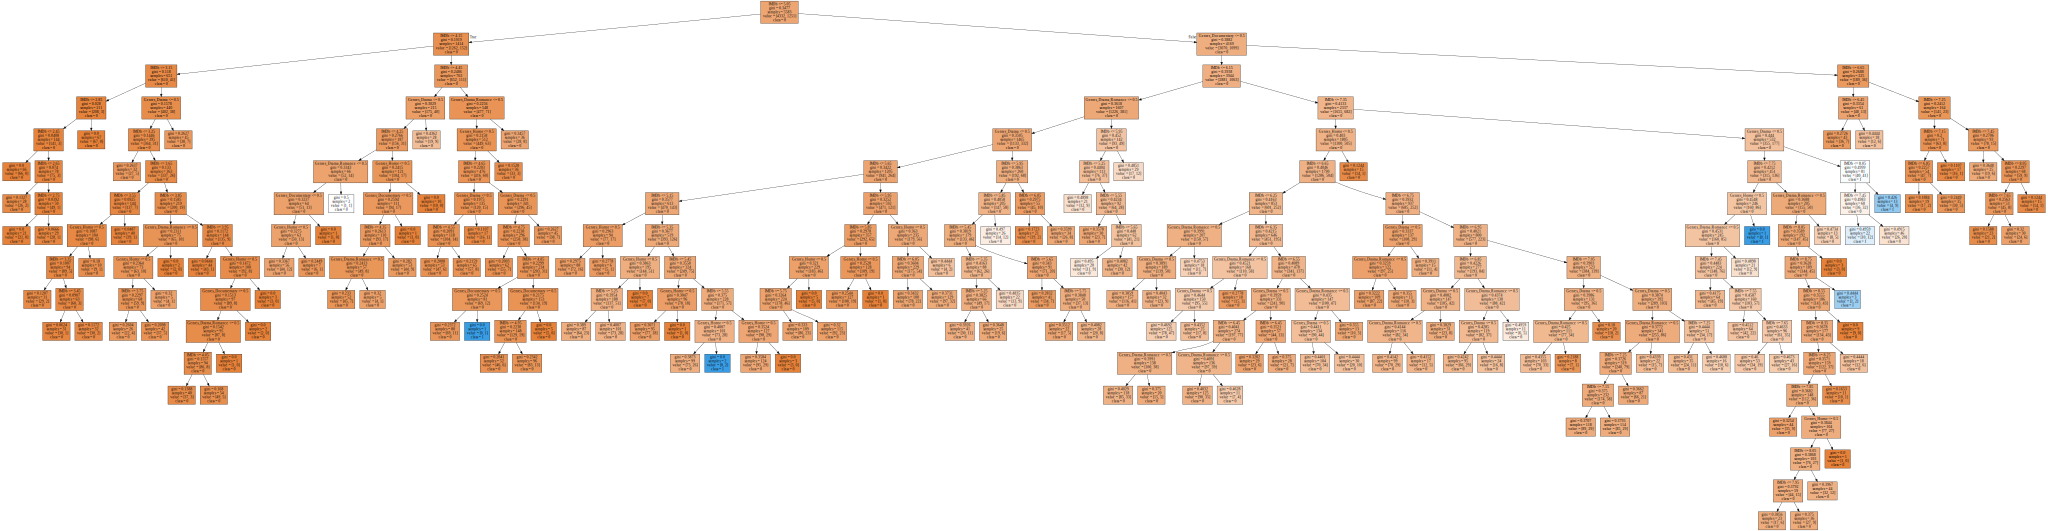

In [519]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [520]:
net_train_score_1 = accuracy_score(y_train, y_pred_t1)*100

In [521]:
net_test_score_1 = accuracy_score(y_test, y_pred1)*100
net_test_score_1

78.93982808022922

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1105
           1       0.36      0.01      0.03       291

    accuracy                           0.79      1396
   macro avg       0.58      0.50      0.45      1396
weighted avg       0.70      0.79      0.70      1396



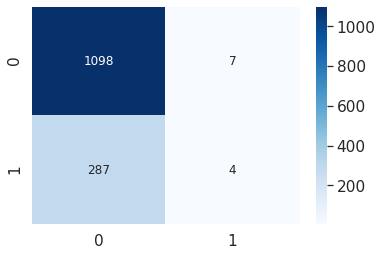

In [522]:
print(classification_report(y_test, y_pred1))
cm1 = confusion_matrix(y_test, y_pred1)
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 12}, fmt='g') # font size
plt.show()

#Prime

In [523]:
train, test = train_test_split(one_hot_data, test_size =0.30,random_state=1)

In [524]:
train.shape

(4885, 1007)

In [525]:
test.shape

(2094, 1007)

In [526]:
c1 = DecisionTreeClassifier(min_samples_split=50)

In [527]:
X_train = train[features]
y_train = train['Prime']

X_test = test[features]
y_test = test['Prime']

In [528]:
tree2 = c1.fit(X_train, y_train)

In [529]:
y_pred_t2 = c1.predict(X_train)

In [530]:
y_pred2 = c1.predict(X_test)

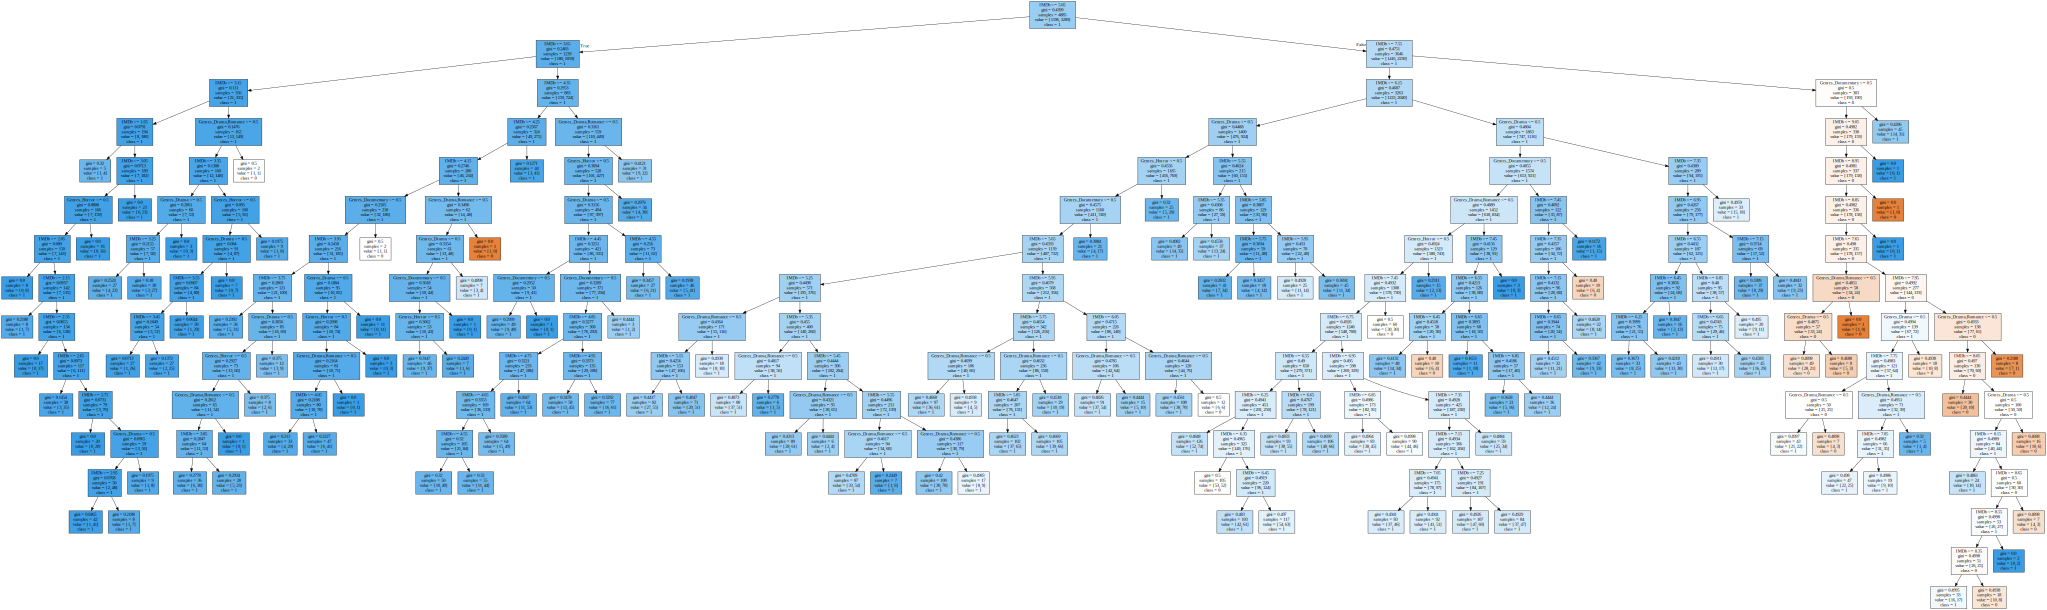

In [531]:
dot_data = tree.export_graphviz(tree2,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [532]:
prime_train_score_2 = accuracy_score(y_train, y_pred_t2)*100

In [533]:
prime_test_score_2 = accuracy_score(y_test, y_pred2)*100
prime_test_score_2

69.05444126074498

              precision    recall  f1-score   support

           0       0.46      0.12      0.19       633
           1       0.71      0.94      0.81      1461

    accuracy                           0.69      2094
   macro avg       0.58      0.53      0.50      2094
weighted avg       0.63      0.69      0.62      2094



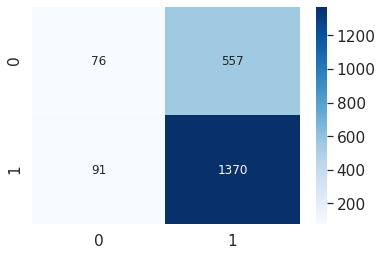

In [534]:
print(classification_report(y_test, y_pred2))
cm1 = confusion_matrix(y_test, y_pred2)
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 12}, fmt='g') # font size
plt.show()

#Hotstar

In [623]:
train, test = train_test_split(one_hot_data, test_size =0.20,random_state=1)

In [624]:
train.shape

(5583, 1007)

In [625]:
test.shape

(1396, 1007)

In [708]:
c1 = DecisionTreeClassifier(min_samples_split=30)

In [709]:
X_train = train[features]
y_train = train['Disney']

X_test = test[features]
y_test = test['Disney']

In [710]:
tree3 = c1.fit(X_train, y_train)

In [711]:
y_pred_t3 = c1.predict(X_train)

In [712]:
y_pred3 = c1.predict(X_test)

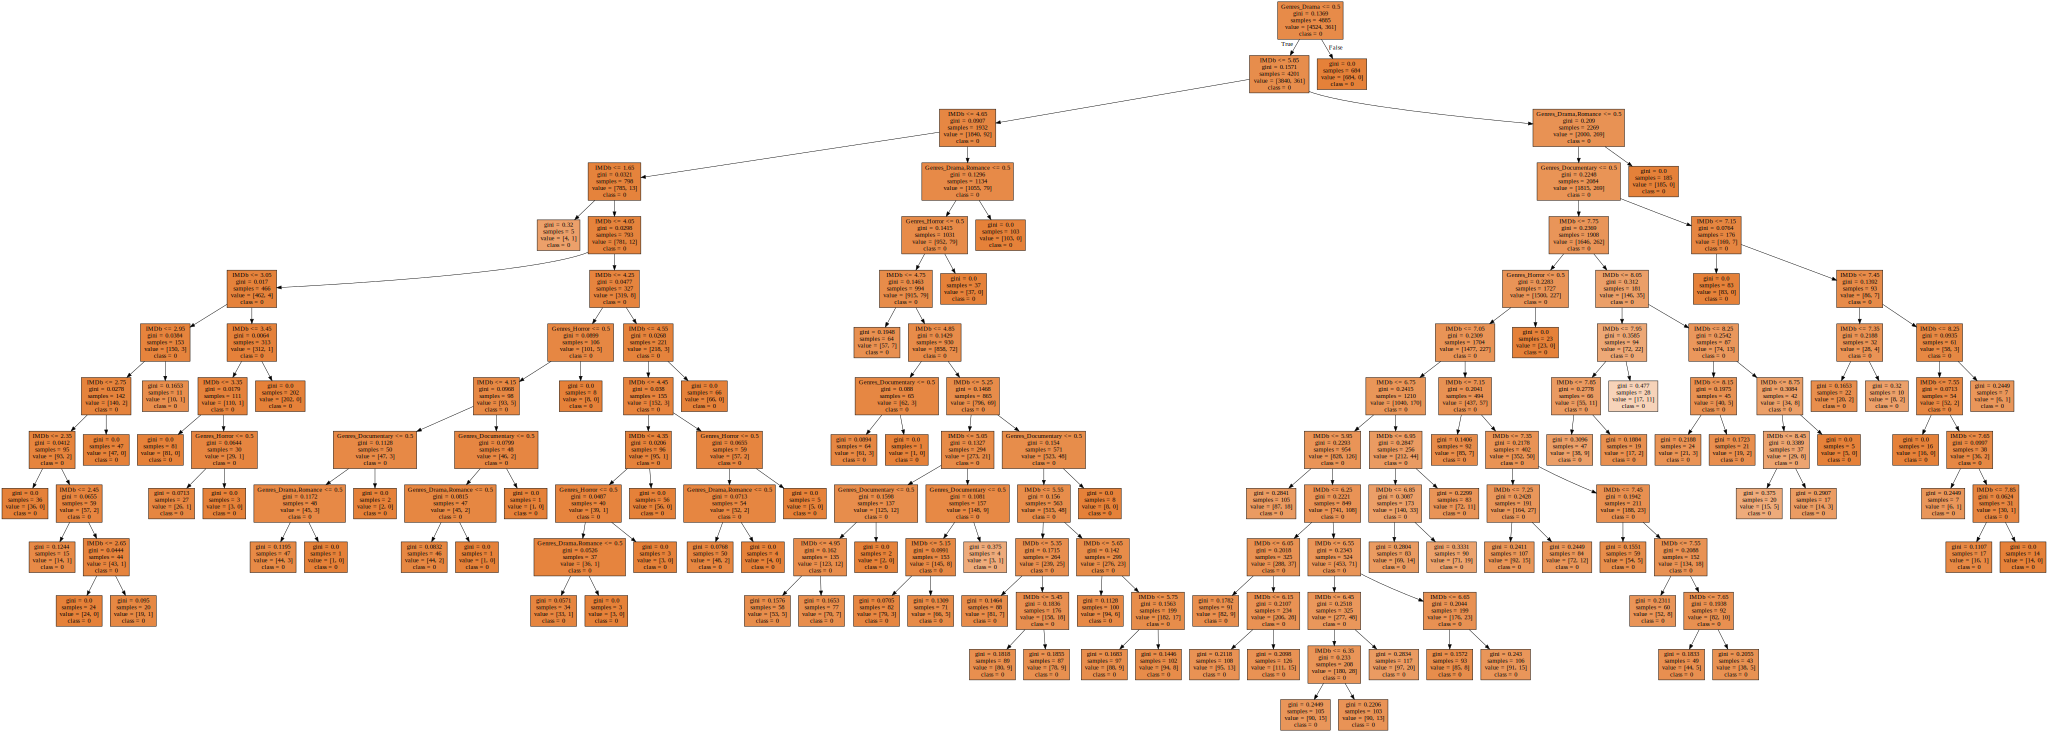

In [713]:
dot_data = tree.export_graphviz(tree3,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [714]:
disney_train_score_3 = accuracy_score(y_train, y_pred_t3)*100

In [715]:
disney_test_score_3 = accuracy_score(y_test, y_pred3)*100
disney_test_score_3

93.93505253104108

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1967
           1       0.00      0.00      0.00       127

    accuracy                           0.94      2094
   macro avg       0.47      0.50      0.48      2094
weighted avg       0.88      0.94      0.91      2094



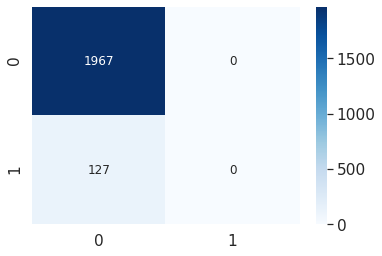

In [716]:
print(classification_report(y_test, y_pred3))
cm1 = confusion_matrix(y_test, y_pred3)
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 12}, fmt='g') # font size
plt.show()

#Hulu

In [717]:
train, test = train_test_split(one_hot_data, test_size =0.30,random_state=1)

In [718]:
train.shape

(4885, 1007)

In [719]:
test.shape

(2094, 1007)

In [720]:
c1 = DecisionTreeClassifier(min_samples_split=30)

In [721]:
X_train = train[features]
y_train = train['Hulu']

X_test = test[features]
y_test = test['Hulu']

In [722]:
tree4 = c1.fit(X_train, y_train)

In [723]:
y_pred_t4 = c1.predict(X_train)

In [724]:
y_pred4 = c1.predict(X_test)

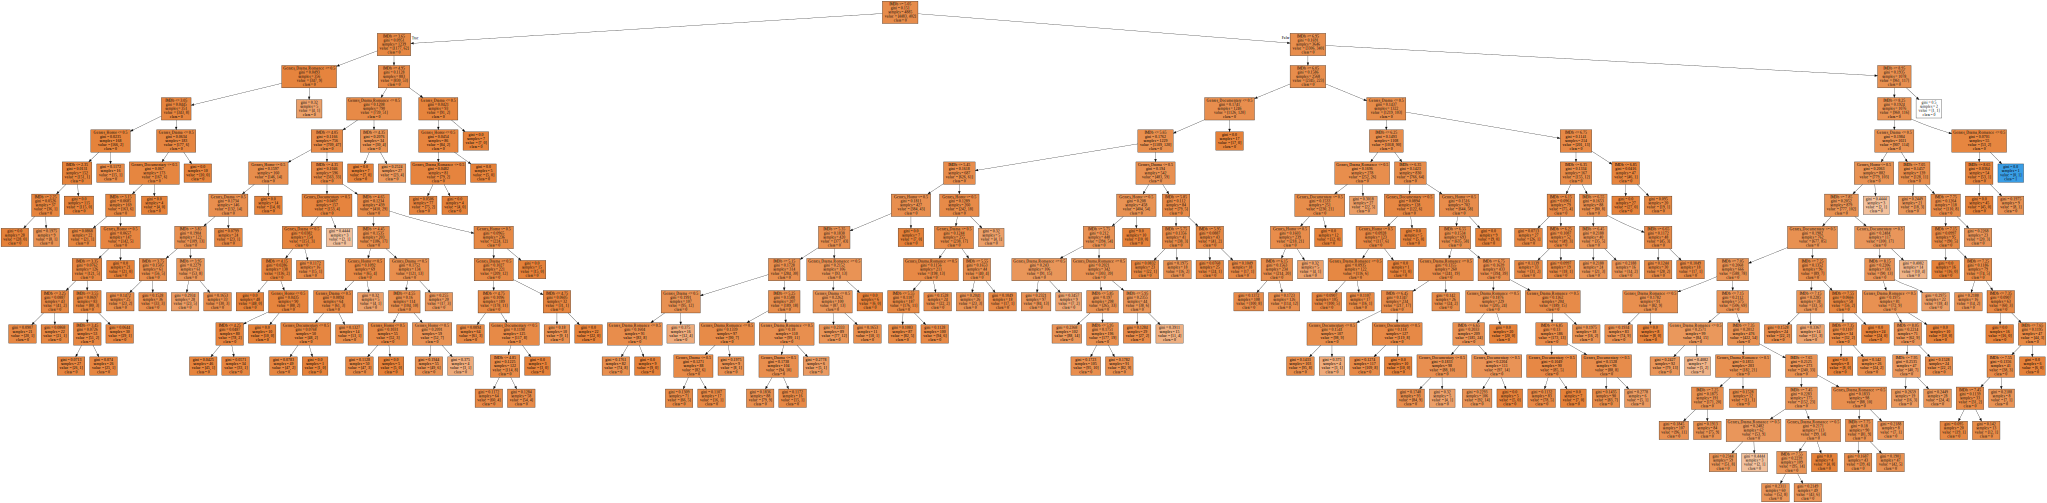

In [725]:
dot_data = tree.export_graphviz(tree4,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [726]:
hulu_train_score_4 = accuracy_score(y_train, y_pred_t4)*100

In [727]:
hulu_test_score_4 = accuracy_score(y_test, y_pred4)*100
hulu_test_score_4

92.16809933142312

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1930
           1       0.00      0.00      0.00       164

    accuracy                           0.92      2094
   macro avg       0.46      0.50      0.48      2094
weighted avg       0.85      0.92      0.88      2094



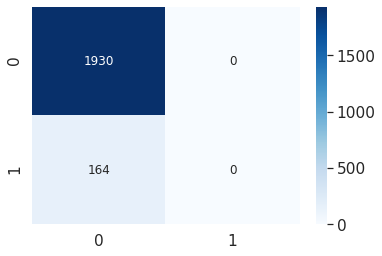

In [728]:
print(classification_report(y_test, y_pred4))
cm1 = confusion_matrix(y_test, y_pred4)
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 12}, fmt='g') # font size
plt.show()

#Logistic Regression 

#Netflix

In [729]:
one_hot_data['Netflix'].value_counts()

0    5437
1    1542
Name: Netflix, dtype: int64

In [750]:
#Split data into attributes and class
X = one_hot_data.drop(['Hulu','Prime','Netflix','Disney'],axis=1)
y = one_hot_data['Netflix']

#perform training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

#Dummy Classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
y_pred = clf.predict(X_test)

#Distribution of y test
print('y actual : \n' +  str(y_test.value_counts()))

#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

y actual : 
0    1369
1     376
Name: Netflix, dtype: int64
y predicted : 
0    1745
dtype: int64


In [752]:
X_train.shape

(5234, 1003)

In [754]:
X_test.shape

(1745, 1003)

In [731]:
# Model Evaluation metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.7845272206303725
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[1369    0]
 [ 376    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [732]:

#Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1369
           1       0.35      0.02      0.03       376

    accuracy                           0.78      1745
   macro avg       0.57      0.50      0.45      1745
weighted avg       0.69      0.78      0.69      1745



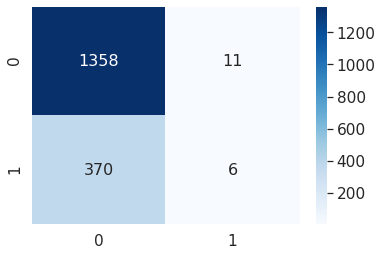

In [733]:
print(classification_report(y_test, y_pred))
rf_cm = confusion_matrix(y_test, y_pred)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

#Prime

In [734]:
one_hot_data['Prime'].value_counts()

1    4750
0    2229
Name: Prime, dtype: int64

In [735]:
#Split data into attributes and class
X = one_hot_data.drop(['Hulu','Prime','Netflix','Disney'],axis=1)
y = one_hot_data['Prime']

#perform training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Dummy Classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
y_pred1 = clf.predict(X_test)

#Distribution of y test
print('y actual : \n' +  str(y_test.value_counts()))

#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred1).value_counts()))

y actual : 
1    1170
0     575
Name: Prime, dtype: int64
y predicted : 
1    1745
dtype: int64


In [736]:
# Model Evaluation metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred1)))
print('Precision Score : ' + str(precision_score(y_test,y_pred1)))
print('Recall Score : ' + str(recall_score(y_test,y_pred1)))
print('F1 Score : ' + str(f1_score(y_test,y_pred1)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred1)))

Accuracy Score : 0.670487106017192
Precision Score : 0.670487106017192
Recall Score : 1.0
F1 Score : 0.8027444253859348
Confusion Matrix : 
[[   0  575]
 [   0 1170]]


In [737]:

#Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.67      0.23      0.34       575
           1       0.71      0.94      0.81      1170

    accuracy                           0.71      1745
   macro avg       0.69      0.59      0.58      1745
weighted avg       0.70      0.71      0.66      1745



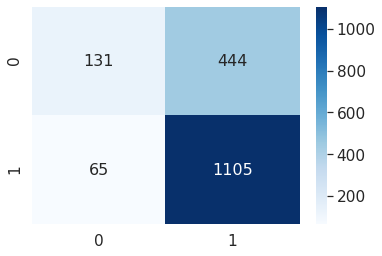

In [738]:
print(classification_report(y_test, y_pred))
rf_cm = confusion_matrix(y_test, y_pred)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

#Hotstar

In [739]:
one_hot_data['Disney'].value_counts()

0    6491
1     488
Name: Disney, dtype: int64

In [740]:
#Split data into attributes and class
X = one_hot_data.drop(['Hulu','Prime','Netflix','Disney'],axis=1)
y = one_hot_data['Disney']

#perform training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Dummy Classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
y_pred1 = clf.predict(X_test)

#Distribution of y test
print('y actual : \n' +  str(y_test.value_counts()))

#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred1).value_counts()))

y actual : 
0    1627
1     118
Name: Disney, dtype: int64
y predicted : 
0    1745
dtype: int64


In [741]:
# Model Evaluation metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred1)))
print('Precision Score : ' + str(precision_score(y_test,y_pred1)))
print('Recall Score : ' + str(recall_score(y_test,y_pred1)))
print('F1 Score : ' + str(f1_score(y_test,y_pred1)))


Accuracy Score : 0.932378223495702
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [742]:

#Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train,y_train)
y_pred1 = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.68      0.08      0.15      1627
           1       0.04      0.47      0.07       118

    accuracy                           0.11      1745
   macro avg       0.36      0.27      0.11      1745
weighted avg       0.64      0.11      0.14      1745



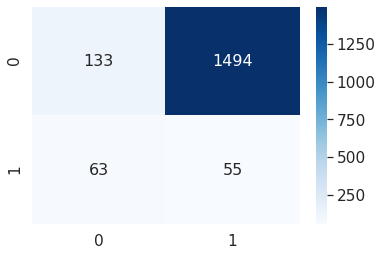

In [743]:
print(classification_report(y_test, y_pred))
rf_cm = confusion_matrix(y_test, y_pred)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

#Hulu

In [744]:
one_hot_data['Hulu'].value_counts()

0    6413
1     566
Name: Hulu, dtype: int64

In [745]:
#Split data into attributes and class
X = one_hot_data.drop(['Hulu','Prime','Netflix','Disney'],axis=1)
y = one_hot_data['Hulu']

#perform training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Dummy Classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
y_pred1 = clf.predict(X_test)

#Distribution of y test
print('y actual : \n' +  str(y_test.value_counts()))

#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred1).value_counts()))

y actual : 
0    1607
1     138
Name: Hulu, dtype: int64
y predicted : 
0    1745
dtype: int64


In [746]:
# Model Evaluation metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred1)))
print('Precision Score : ' + str(precision_score(y_test,y_pred1)))
print('Recall Score : ' + str(recall_score(y_test,y_pred1)))
print('F1 Score : ' + str(f1_score(y_test,y_pred1)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred1)))

Accuracy Score : 0.9209169054441261
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[1607    0]
 [ 138    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [747]:

#Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train,y_train)
y_pred1 = clf.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.89      0.11      0.19      1607
           1       0.08      0.85      0.14       138

    accuracy                           0.17      1745
   macro avg       0.48      0.48      0.17      1745
weighted avg       0.83      0.17      0.19      1745



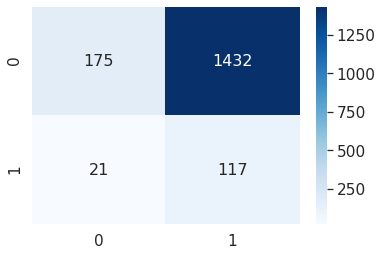

In [748]:
print(classification_report(y_test, y_pred))
rf_cm = confusion_matrix(y_test, y_pred)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()